In [1]:
from windwhisper import windturbines
import xarray as xr

# we can preload the wind speed data, otherwise, the tool will do it every time
filepath_wind_speed = "/Users/romain/GitHub/windwhisper/dev/fixtures/era5_mean_2013-2022_month_by_hour.nc"
filepath_correction = "/Users/romain/GitHub/windwhisper/dev/fixtures/ratio_gwa2_era5.nc"
def wind_speed_data():
    wind_speed = xr.open_dataset(filepath_wind_speed).to_array().mean(dim="month")
    correction = xr.open_dataset(filepath_correction).to_array()
    correction = correction.sel(variable='ratio_gwa2_era5_mean_WS').interp(latitude=wind_speed.latitude, longitude=wind_speed.longitude, method="linear")
    return wind_speed * correction
data = wind_speed_data()


wind_turbines = {
    'Turbine 0': 
     {'diameter': 70.0,
   'hub height': 85.0,
   'position': (56.058876188889336, 9.168131682791335),
   'power': 2500.0},
    'Turbine 1': 
     {'diameter': 60.0,
   'hub height': 55.0,
   'position': (56.056401696668765, 9.1822743380901537),
   'power': 1500.0},
}


wt = windturbines.WindTurbines(
    wind_turbines=wind_turbines,
    wind_speed_data=data,
    #listeners=listening_points,
    #retrain_model=True
)

Coordinates:
  * lat      (lat) float64 800B 56.05 56.05 56.05 56.05 ... 56.07 56.07 56.07
  * lon      (lon) float64 800B 9.158 9.158 9.159 9.159 ... 9.192 9.192 9.192
  * turbine  (turbine) <U9 72B 'Turbine 0' 'Turbine 1'
Bounding box dimensions: 2499.052965673787m x 2120.4235186663545m


/Users/romain/anaconda3/envs/windwhisper/lib/python3.11/site-packages/rasterio/io.py:140: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  rd = DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


In [2]:
wt.noise_map.euclidian_distances

<xarray.DataArray (lat: 100, lon: 100, turbine: 2)> Size: 160kB
array([[[1519.74700788, 1866.54703086],
        [1511.12369356, 1849.39062643],
        [1502.75610018, 1832.32389297],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[1496.74205499, 1851.61657527],
        [1487.98544525, 1834.32056108],
        [1479.48700688, 1817.1123165 ],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[1473.8103692 , 1836.91166885],
        [1464.9167106 , 1819.4759048 ],
        [1456.28367131, 1802.12594278],
        ...,
...
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]]])
Coordinates:
  * lat      (lat) float64 800B 56.05 56.05 56.05 56.05 ... 56.07 56.07 56.07
  * lon      (lon) float64 800B 9.158 9.158 9.159 9.159 ... 9.192 9.192 9.192
  * turbine  (turbine) <U9 72B 'Turbine 0' 'Turbine 1'

In [3]:
res.shape

(100, 100)

In [4]:
res.isnull().sum()

<xarray.DataArray ()> Size: 8B
array(1900)

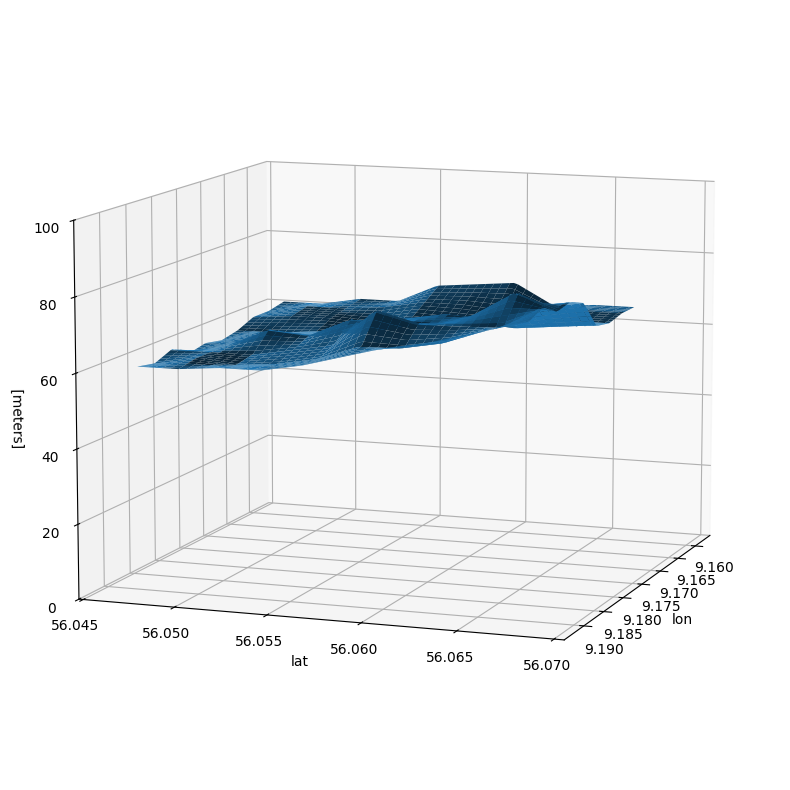

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 100)

res.plot.surface()

# Set the azimuth and elevation angles
ax.view_init(azim=20, elev=10)

In [3]:
wt.noise_analysis.lden_map.lon.values

array([7.20703062, 7.20721213, 7.20739364, 7.20757515, 7.20775666,
       7.20793817, 7.20811968, 7.20830119, 7.20848269, 7.2086642 ,
       7.20884571, 7.20902722, 7.20920873, 7.20939024, 7.20957175,
       7.20975326, 7.20993477, 7.21011627, 7.21029778, 7.21047929,
       7.2106608 , 7.21084231, 7.21102382, 7.21120533, 7.21138684,
       7.21156835, 7.21174985, 7.21193136, 7.21211287, 7.21229438,
       7.21247589, 7.2126574 , 7.21283891, 7.21302042, 7.21320192,
       7.21338343, 7.21356494, 7.21374645, 7.21392796, 7.21410947,
       7.21429098, 7.21447249, 7.214654  , 7.2148355 , 7.21501701,
       7.21519852, 7.21538003, 7.21556154, 7.21574305, 7.21592456,
       7.21610607, 7.21628758, 7.21646908, 7.21665059, 7.2168321 ,
       7.21701361, 7.21719512, 7.21737663, 7.21755814, 7.21773965,
       7.21792115, 7.21810266, 7.21828417, 7.21846568, 7.21864719,
       7.2188287 , 7.21901021, 7.21919172, 7.21937323, 7.21955473,
       7.21973624, 7.21991775, 7.22009926, 7.22028077, 7.22046

In [3]:
from windwhisper.atmospheric_absorption import get_absorption_coefficient

get_absorption_coefficient(temperature=20, humidity=70)

2.846694170459085

In [5]:
import numpy as np

extracted_levels = [54.37, 54.47, 56.14, 58.92, 65.67, 75.95, 89.25, 84.69]
spectral_shape = 10**(np.array(extracted_levels) / 10)
normalized_shape = spectral_shape / spectral_shape.sum()
print(normalized_shape)

[2.31679430e-04 2.37075937e-04 3.48247073e-04 6.60522286e-04
 3.12526951e-03 3.33340034e-02 7.12668356e-01 2.49394847e-01]


In [3]:
import numpy as np
# Generate a theoretical pink noise spectral shape
octave_bands = [31.5, 63, 125, 250, 500, 1000, 2000, 4000]
pink_noise_shape = 1 / np.sqrt(np.array(octave_bands))  # Power reduces with frequency
normalized_shape = pink_noise_shape / pink_noise_shape.sum()
print(normalized_shape)

[0.31183849 0.22050311 0.15654168 0.11069168 0.07827084 0.05534584
 0.03913542 0.02767292]


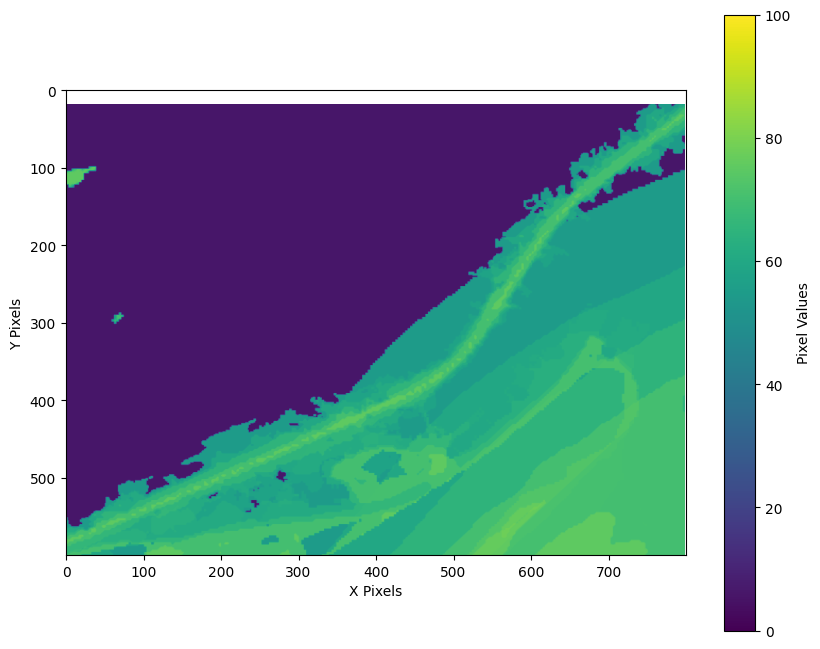

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wt.noise_analysis.merged_map["ambient"], vmin=0, vmax=100)
plt.colorbar(label="Pixel Values")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.grid(False)  # Disable grid for better visualization

plt.show()

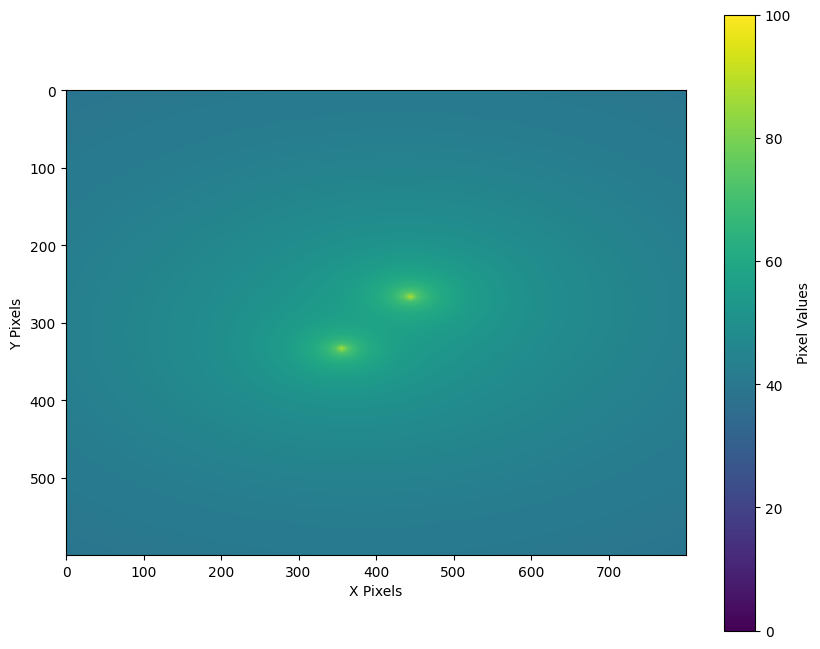

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wt.noise_analysis.merged_map["wind"], vmin=0, vmax=100)
plt.colorbar(label="Pixel Values")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.grid(False)  # Disable grid for better visualization
plt.show()

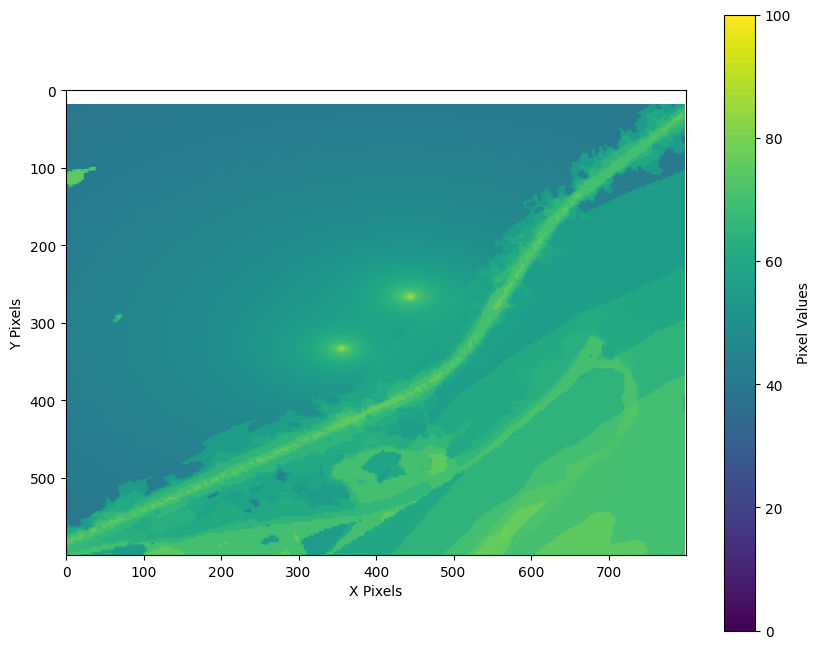

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wt.noise_analysis.merged_map["combined"], vmin=0, vmax=100)
plt.colorbar(label="Pixel Values")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.grid(False)  # Disable grid for better visualization
plt.show()

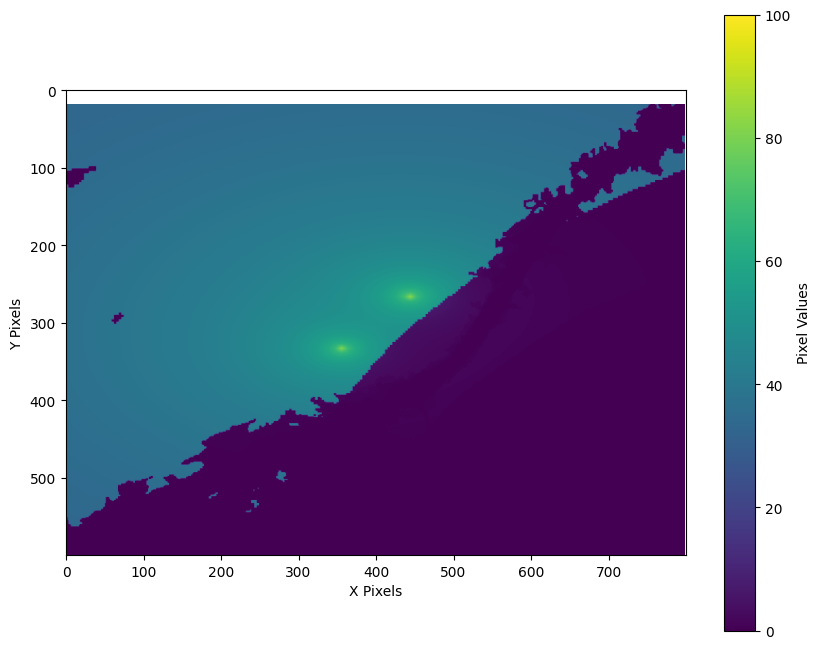

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wt.noise_analysis.merged_map["net"], vmin=0, vmax=100)
plt.colorbar(label="Pixel Values")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.grid(False)  # Disable grid for better visualization
plt.show()

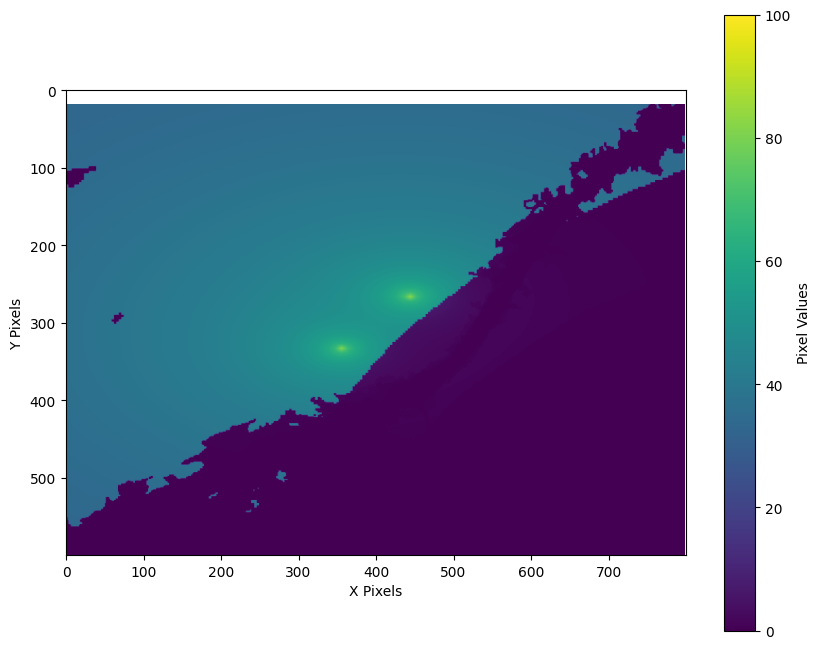

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wt.noise_analysis.merged_map["net"], vmin=0, vmax=100)
plt.colorbar(label="Pixel Values")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.grid(False)  # Disable grid for better visualization
plt.show()

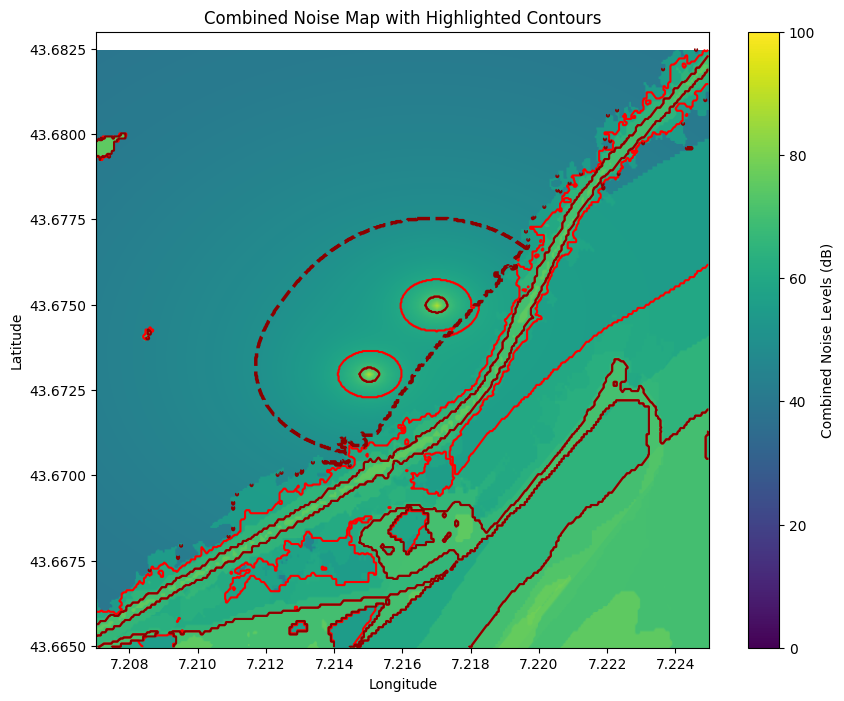

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the contour plot
plt.figure(figsize=(10, 8))

# Base map: Combined noise levels
plt.imshow(wt.noise_analysis.merged_map["combined"], vmin=0, vmax=100, origin="upper", extent=[
    wt.noise_analysis.merged_map["lon"].values.min(), wt.noise_analysis.merged_map["lon"].values.max(),
    wt.noise_analysis.merged_map["lat"].values.min(), wt.noise_analysis.merged_map["lat"].values.max()
])
plt.colorbar(label="Combined Noise Levels (dB)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Combined Noise Map with Highlighted Contours")


# Settlement layer overlay (e.g., using a transparent heatmap)
# Mask the settlement layer with the flip contour
#settlement_within_flip = wt.noise_analysis.merged_map["settlement"].where(wt.noise_analysis.merged_map["flip"], drop=True)
#settlement_within_flip.plot(cmap="Greens")


plt.contour(
    wt.noise_analysis.merged_map["contour_70"],
    levels=[0.5],  # Contour at the boundary of highlighted areas
    colors="red",
    linewidths=1.5,
    origin="upper",
    extent=[
        wt.noise_analysis.merged_map["lon"].values.min(), wt.noise_analysis.merged_map["lon"].values.max(),
        wt.noise_analysis.merged_map["lat"].values.min(), wt.noise_analysis.merged_map["lat"].values.max()
    ]
)


plt.contour(
    wt.noise_analysis.merged_map["contour_80"],
    levels=[0.5],  # Contour at the boundary of highlighted areas
    colors="darkred",
    linewidths=1.5,
    origin="upper",
    extent=[
        wt.noise_analysis.merged_map["lon"].values.min(), wt.noise_analysis.merged_map["lon"].values.max(),
        wt.noise_analysis.merged_map["lat"].values.min(), wt.noise_analysis.merged_map["lat"].values.max()
    ]
)

plt.contour(
    wt.noise_analysis.merged_map["flip"],
    levels=[0.5],  # Contour at the boundary of highlighted areas
    colors="darkred",
    linewidths=2.5,
    linestyles="--",
    origin="upper",
    extent=[
        wt.noise_analysis.merged_map["lon"].values.min(), wt.noise_analysis.merged_map["lon"].values.max(),
        wt.noise_analysis.merged_map["lat"].values.min(), wt.noise_analysis.merged_map["lat"].values.max()
    ]
)

plt.grid(False)  # Optional: Disable grid for better visualization
plt.show()

In [52]:

import numpy as np

def calculate_area_per_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.

    Args:
        lat (xarray.DataArray or np.ndarray): Latitude values (1D or 2D array).
        lon (xarray.DataArray or np.ndarray): Longitude values (1D or 2D array).

    Returns:
        np.ndarray: 2D array of area per grid cell in square meters.
    """
    # Earth's radius in meters
    R = 6371000  

    # Ensure lat and lon are 2D (if not, meshgrid them)
    if lat.ndim == 1 and lon.ndim == 1:
        lat, lon = np.meshgrid(lat, lon, indexing="ij")

    # Calculate absolute differences in latitude and longitude (in radians)
    dlat = np.abs(np.radians(np.diff(lat, axis=0)))  # Shape (n-1, m)
    dlon = np.abs(np.radians(np.diff(lon, axis=1)))  # Shape (n, m-1)

    # Use the average latitude to compute the East-West extent
    avg_lat = np.radians(lat[:-1, :] + lat[1:, :]) / 2  # Shape (n-1, m)

    # Ensure dlat and dlon align for broadcasting
    dlat = dlat[:, :-1]  # Truncate dlat to match the reduced shape of dlon

    # Calculate grid cell dimensions
    dy = R * dlat  # North-South distance (2D array)
    dx = R * np.cos(avg_lat)[:, 1:] * dlon[1:,:]  # East-West distance (2D array)

    # Calculate the area of each grid cell
    area = dx * dy
    return area


# Ensure lat and lon are 1D arrays
if lat.ndim > 1:
    lat = lat[:, 0]  # Take the first column
if lon.ndim > 1:
    lon = lon[0, :]  # Take the first row

# Compute area per grid cell
grid_area = calculate_area_per_grid(lat, lon)


In [53]:
grid_area.mean()

6.062202249347208

In [54]:
settlement_within_flip.sum() * grid_area.mean()

<xarray.DataArray 'settlement' ()> Size: 8B
array(189977.29409004)
Coordinates:
    hour     int64 8B 0

In [39]:
grid_area

array([[-6.06129179, -6.06129179, -6.06129179, ..., -6.06129179,
        -6.06129179, -6.06129179],
       [-6.06129483, -6.06129483, -6.06129483, ..., -6.06129483,
        -6.06129483, -6.06129483],
       [-6.06129788, -6.06129788, -6.06129788, ..., -6.06129788,
        -6.06129788, -6.06129788],
       ...,
       [-6.06310652, -6.06310652, -6.06310652, ..., -6.06310652,
        -6.06310652, -6.06310652],
       [-6.06310956, -6.06310956, -6.06310956, ..., -6.06310956,
        -6.06310956, -6.06310956],
       [-6.06311261, -6.06311261, -6.06311261, ..., -6.06311261,
        -6.06311261, -6.06311261]])

In [2]:
from windwhisper.settlement import get_wsf_map_preview
bbox = [7.206186051195476, 43.66494513682356, 7.224999999999999, 43.68249063203883, ]
data = get_wsf_map_preview(bbox)

In [3]:
data.shape

(512, 512)

In [3]:
import requests
import json

# Base URLs for STAC API and WMS
STAC_API_URL = "https://geoservice.dlr.de/eoc/ogc/stac/v1"
WMS_BASE_URL = "https://geoservice.dlr.de/eoc/wms"


# Function to query WMS for a map preview
def get_wsf_map_preview(bbox, layers="WSF_2019"):
    params = {
        "service": "WMS",
        "request": "GetMap",
        "layers": layers,
        "bbox": ",".join(map(str, bbox)),
        "width": 512,
        "height": 512,
        "srs": "EPSG:4326",
        "format": "image/png",
    }
    response = requests.get(WMS_BASE_URL, params=params)
    if response.status_code == 200:
        # Save the image locally
        with open("wsf_preview.png", "wb") as file:
            file.write(response.content)

    else:
        print(f"Error: {response.status_code} - {response.text}")

# Fetch a WMS map preview
print("\nFetching WSF_2019 map preview...")
# Define a bounding box [min_lon, min_lat, max_lon, max_lat]
bbox = [43.66494513682356, 7.206186051195476, 43.68249063203883, 7.224999999999999,]
bbox = [7.206186051195476, 43.66494513682356, 7.224999999999999, 43.68249063203883, ]
  
#bbox = [-100.010069, 15.989922, -97.989938, 18.010054]  # Example from your dataset
get_wsf_map_preview(bbox)



Fetching WSF_2019 map preview...


Text(0, 0.5, 'Latitude')

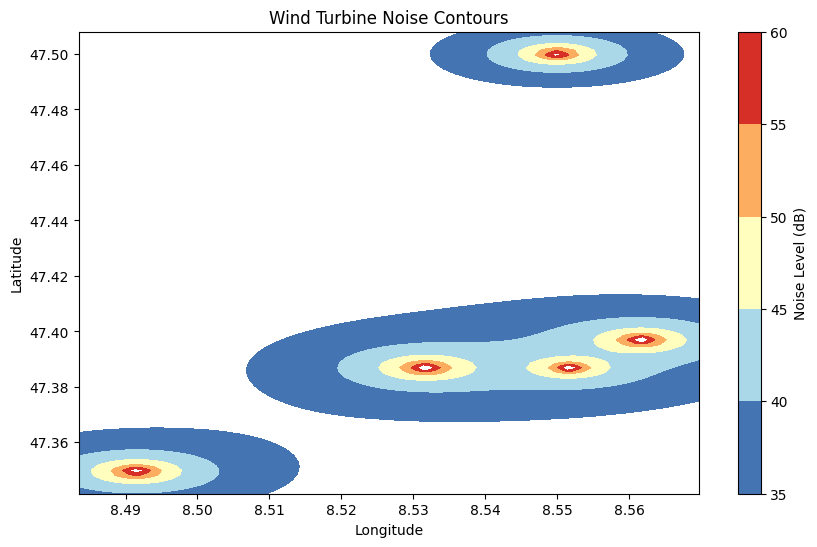

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Define contour levels starting from 35 dB
contour_levels = [35, 40, 45, 50, 55, 60]

# add bounding box
plt.xlim(wt.noise_map.LON.min(), wt.noise_map.LON.max())
plt.ylim(wt.noise_map.LAT.min(), wt.noise_map.LAT.max())

plt.contourf(
    wt.noise_map.LON,  # x-axis, longitude
    wt.noise_map.LAT,  # y-axis, latitude
    wt.noise_map.noise_level_at_mean_wind_speed.sum(dim="wind_speed"),
    levels=contour_levels,
    cmap="RdYlBu_r",
)

plt.colorbar(label="Noise Level (dB)")
plt.title("Wind Turbine Noise Contours")
plt.xlabel("Longitude")  # Correct label for x-axis
plt.ylabel("Latitude")  # Correct label for y-axis